# Part 0-0: Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.ex2_reg import *
np.set_printoptions(precision=4)

In [2]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Part 0-1: Load and Plot Data

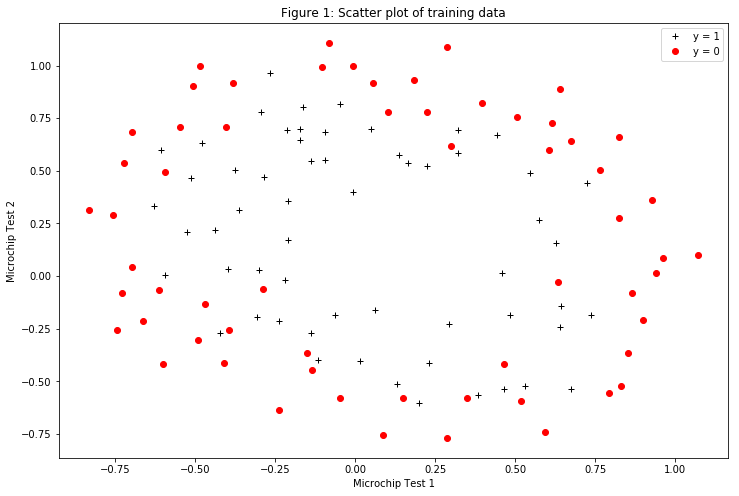

In [3]:
plt.rcParams['figure.figsize'] = (12, 8)    
# The first two columns contains the exam scores and the third column contains the label.
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X_ori = data[:, 0:2]
y = data[:, 2:3]
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
X_pos = X_ori[y.reshape(-1) == 1]
X_neg = X_ori[y.reshape(-1) == 0]
plt.plot(X_pos[:, 0], X_pos[:, 1], 'k+', label='y = 1')
plt.plot(X_neg[:, 0], X_neg[:, 1], 'ro', label='y = 0')
plt.legend()
plt.show()

# Part 1: Regularized Logistic Regression

In [4]:
# Get feature
X = map_feature(X_ori[:, 0], X_ori[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(28)

# Set regularization parameter lambda to 1
# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = cost_function_reg(initial_theta, X, y, 1)

print('Cost at initial theta (zeros): %.4f' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:', grad[:5])
print('Expected gradients (approx) - first five values only: [0.0085, 0.0188, 0.0001, 0.0503, 0.0115]')

# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones(28)
cost, grad = cost_function_reg(test_theta, X, y, 10)
print('\nCost at test theta (with lambda = 10): %.4f' % cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:', grad[:5])
print('Expected gradients (approx) - first five values only: [0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.6931
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only: [8.4746e-03 1.8788e-02 7.7771e-05 5.0345e-02 1.1501e-02]
Expected gradients (approx) - first five values only: [0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

Cost at test theta (with lambda = 10): 3.1645
Expected cost (approx): 3.16
Gradient at test theta - first five values only: [0.346  0.1614 0.1948 0.2269 0.0922]
Expected gradients (approx) - first five values only: [0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


# Part 2: Regularization and Accuracies

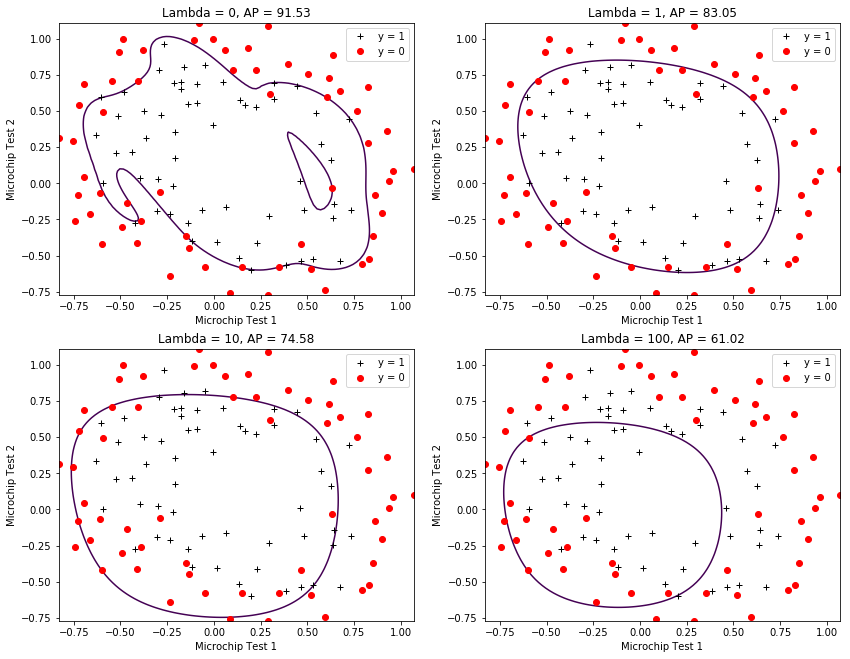

In [5]:
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = (14, 11)    

cost = lambda theta, X, y, L: cost_function_reg(theta, X, y, L)[0]
grad = lambda theta, X, y, L: cost_function_reg(theta, X, y, L)[1]

for i, L in enumerate([0, 1, 10, 100], 1):
    # Minimize lost
    result = minimize(cost, initial_theta, args=(X, y, L), jac=grad)#, options={'maxiter': 400})
    # Plot result
    plt.subplot(2, 2, i)
    if result.success: 
        # Get optimized theta
        theta = result.x.reshape(-1, 1)
        # Compute AP
        predicted_labels = (X @ theta).reshape(-1) >= 0
        actual_labels = y.reshape(-1) > 0.5
        num_fault = np.sum(np.logical_xor(predicted_labels, actual_labels))
        N = actual_labels.shape[0]
        ap = (N - num_fault) / N
        # Plot prediction result
        plt.title('Lambda = %d, AP = %.2f' % (L, 100 * ap))
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')
        X_pos = X_ori[actual_labels]
        X_neg = X_ori[np.logical_not(actual_labels)]
        plt.plot(X_pos[:, 0], X_pos[:, 1], 'k+', label='y = 1')
        plt.plot(X_neg[:, 0], X_neg[:, 1], 'ro', label='y = 0')
        plt.legend()
        # Plot decision boundary
        scale = 100 # control the granularity of the decision boundry plot
        test_1_ticks = np.linspace(np.min(X_ori[:, 0]), np.max(X_ori[:, 0]), scale)
        test_2_ticks = np.linspace(np.min(X_ori[:, 1]), np.max(X_ori[:, 1]), scale)
        test_1, test_2 = np.meshgrid(test_1_ticks, test_2_ticks, indexing='ij')
        XX = map_feature(test_1.reshape(-1), test_2.reshape(-1))
        Z = (XX @ theta).reshape(scale, scale)
        c = plt.contour(test_1, test_2, Z, levels=[0])
    else:
        print('FAIL to optimize for L = %d ...' % L)
plt.show()